# AI Hub Open API 서비스

https://aiopen.etri.re.kr/service_list.php

## 오픈 AI API·DATA 서비스

- ETRI에서 과학기술정보통신부 R&D 과제를 통해 개발된 최첨단 인공지능 기술들을 오픈 API 형태로 개발  
- 중소·벤처 기업, 학교, 개인 개발자 등의 다양한 사용자들에게 제공  


> API(Application Programming Interface):  
  컴퓨터나 컴퓨터 프로그램 사이의 연결을 할 수 있도록 제공

# 위키백과 QA API 란?

> 자연어로 기술된 질문의 의미를 분석하여, 위키백과 문서에서 정답과 신뢰도 및 검색 단락을 추론하여 제공하는 API 입니다.  
>
> 위키백과 QA는 질문에서 물어보고자 하는 대상의 정의와 속성에 대해 답을 제공할 수 있을 뿐만 아니라 인물, 장소, 작품 등 다양한 단답형 정답을 묻는 질문에도 답을 할 수 있습니다. 보다 정확한 답을 제공하기 위해 정보검색을 기반으로 언어분석된 결과로부터 정답후보를 찾는 NLP 기반 질의응답 시스템과 기계독해 기반의 딥러닝 기반 질의응답 시스템, 지식베이스 기반의 질의응답 시스템을 통합하여 위키백과 QA 시스템을 구성하였습니다. 정답을 찾는 데이터로는 한국어 위키피디아(2018년 10월 버전, 43만건 문서로 구성) 및 우리말샘 사전을 사용하였습니다.
> 
> 위키백과QA API는HTTP 기반의 REST API 인터페이스로 JSON 포맷 기반의 입력 및 출력을 지원하며 ETRI에서 제공하는 API Key 인증을 통해 사용할 수 있는 Open API 입니다.
>
> https://aiopen.etri.re.kr/guide_wikiQA.php


```python
#-*- coding:utf-8 -*-
import urllib3
import json
 
openApiURL = "http://aiopen.etri.re.kr:8000/WikiQA"
accessKey = "YOUR_ACCESS_KEY"
question = "YOUR_QUESTION"
type = "ENGINE_TYPE"
 
requestJson = {
    "access_key": accessKey,
    "argument": {
        "question": question,
        "type": type
    }
}
 
http = urllib3.PoolManager()
response = http.request(
"POST",
openApiURL,
headers={"Content-Type": "application/json; charset=UTF-8"},
body=json.dumps(requestJson)
)
 
print("[responseCode] " + str(response.status))
print("[responBody]")
print(str(response.data,"utf-8"))
```                        

In [1]:
def get_key(filename):
    mod = int(input("decryption code:"))
    with open(filename, 'r') as f:
        key_str = f.read()
        
    r_key = ([chr(ord(i)-mod) for i in key_str])
    r_key = "".join(r_key)

    return r_key

In [2]:
# https://aiopen.etri.re.kr/guide_wikiQA.php

def wiki_qa(question:str):

    import urllib3
    import json

    access_key = get_key('key.txt')

    openApiURL = "http://aiopen.etri.re.kr:8000/WikiQA"
    question = question
    engine_type = "hybridqa"

    requestJson = {
    "access_key": access_key,
    "argument": {
        "question": question,
        "type": engine_type
        }
    }

    http = urllib3.PoolManager()
    response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
    )

    response_json = json.loads(response.data)
    
    print("-------------------")
    print("[responseCode] " + str(response.status))
    print("[responBody]")
    print(json.dumps(response_json, indent=2))
    print("-------------------")
    
    if response_json['result'] == -1:
        return None
    
    return response_json
                                     

In [ ]:
response = wiki_qa("대한민국의 수도는?")

sample response
```json
-------------------
[responseCode] 200
[responBody]
{
  "result": 0,
  "return_object": {
    "WiKiInfo": {
      "IRInfo": [
        {
          "wiki_title": "",
          "sent": "",
          "url": ""
        }
      ],
      "AnswerInfo": [
        {
          "rank": 1.0,
          "answer": "\uc11c\uc6b8\ud2b9\ubcc4\uc2dc(\uc11c\uc6b8\u7279\u5225\u5e02)\ub294 \ub300\ud55c\ubbfc\uad6d\uc758 \uc218\ub3c4\uc774\uc790 \ub3c4\uc2dc\uc774\ub2e4. \ubc31\uc81c\uc758 \uccab \uc218\ub3c4\uc778 \uc704\ub840\uc131\uc774\uc5c8\uace0, \uace0\ub824 \ub54c\ub294 \ub0a8\uacbd(\u5357\u4eac)\uc774\uc5c8\uc73c\uba70, \uc870\uc120\uc758 \uc218\ub3c4\uac00 \ub41c \uc774\ud6c4\ub85c \ud604\uc7ac\uae4c\uc9c0 \ub300\ud55c\ubbfc\uad6d \uc815\uce58\u00b7\uacbd\uc81c\u00b7\uc0ac\ud68c\u00b7\ubb38\ud654\uc758 \uc911\uc2ec\uc9c0 \uc5ed\ud560\uc744 \ud558\uace0 \uc788\ub2e4. \uc911\uc559\uc73c\ub85c \ud55c\uac15\uc774 \ud750\ub974\uace0, \ubd81\ud55c\uc0b0, \uad00\uc545\uc0b0, \ub3c4\ubd09\uc0b0, \ubd88\uc554\uc0b0, \uc778\ub2a5\uc0b0, \uc778\uc655\uc0b0, \uccad\uacc4\uc0b0 \ub4f1\uc758 \uc5ec\ub7ec \uc0b0\ub4e4\ub85c \ub458\ub7ec\uc2f8\uc778 \ubd84\uc9c0 \uc9c0\ud615\uc758 \ub3c4\uc2dc\uc774\ub2e4. \ub113\uc774\ub294 605.2 km\u00b2\uc73c\ub85c \ub300\ud55c\ubbfc\uad6d \uc804 \uad6d\ud1a0\uc758 0.6%\ub3c4 \ubabb \ubbf8\uce58\uc9c0\ub9cc, \ucc9c\ub9cc \uba85 \uc815\ub3c4\uc758 \uc778\uad6c\uac00 \uc0b4\uace0 \uc788\uc5b4 \uc778\uad6c\ubc00\ub3c4\ub294 \ud604\uc800\ud788 \ub192\ub2e4.",
          "confidence": 0.0,
          "url": [
            "https://ko.wikipedia.org/wiki/\uc11c\uc6b8\ud2b9\ubcc4\uc2dc"
          ]
        }
      ]
    }
  }
}
```

In [9]:
answer = response['return_object']['WiKiInfo']['AnswerInfo'][0]['answer']
print("정답:", answer)

정답: 서울특별시(서울特別市)는 대한민국의 수도이자 도시이다. 백제의 첫 수도인 위례성이었고, 고려 때는 남경(南京)이었으며, 조선의 수도가 된 이후로 현재까지 대한민국 정치·경제·사회·문화의 중심지 역할을 하고 있다. 중앙으로 한강이 흐르고, 북한산, 관악산, 도봉산, 불암산, 인능산, 인왕산, 청계산 등의 여러 산들로 둘러싸인 분지 지형의 도시이다. 넓이는 605.2 km²으로 대한민국 전 국토의 0.6%도 못 미치지만, 천만 명 정도의 인구가 살고 있어 인구밀도는 현저히 높다.


# 사람 상태 이해 API 란?


> 영상 내에 존재하는 모든 사람 영역을 자동으로 검출하고 해당 사람의 상태를 판단하여 사용자에게 그 결과를 출력해주게 됩니다. 본 기술은 도심에서 주취, 기절 등과 같이 쓰러져 도움이 필요한 사람을 자동으로 검출하여 위험 상황 발생 전에 선제적으로 대응할 수 있는 시스템 개발에 사용 될 수 있습니다. 사람 상태 이해 API는 HTTP 기반의 REST API 인터페이스로 JSON 포맷 기반의 입력 및 출력을 지원하며 ETRI에서 제공하는 API Key 인증을 통해 사용할 수 있는 Open API입니다
>
> https://aiopen.etri.re.kr/guide_humanstatus.php

```python

#-*- coding:utf-8 -*-
import urllib3
import json
import base64
openApiURL = "http://aiopen.etri.re.kr:8000/HumanStatus"
accessKey = "YOUR_ACCESS_KEY"
imageFilePath = "IMAGE_FILE_PATH"
type = "IMAGE_FILE_TYPE"

file = open(imageFilePath, "rb")
imageContents = base64.b64encode(file.read()).decode("utf8")
file.close()

requestJson = {
	"access_key": accessKey,
	"argument": {
		"type": type,
		"file": imageContents
	}
}

http = urllib3.PoolManager()
response = http.request(
	"POST",
	openApiURL,
	headers={"Content-Type": "application/json; charset=UTF-8"},
	body=json.dumps(requestJson)
)

print("[responseCode] " + str(response.status))
print("[responBody]")
print(response.data)
```

In [4]:
# aihub 에서  응답받은 데이터를 기반으로 그림 그리기
def draw_status(image_file, status_list, confidence_threshold=0.6):

    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from PIL import Image

    im = Image.open(image_file)

    plt.imshow(im)

    ax = plt.gca()

    for status in status_list:
        confidence = float(status['confidence'])
        if confidence < confidence_threshold:
            continue
        x = float(status['x'])
        y = float(status['y'])
        width = float(status['width'])
        height = float(status['height'])
        text = f"{status['class']}:{confidence:.2f}"


        rect = patches.Rectangle((x,y),
                     width,
                     height,
                     linewidth=2,
                     edgecolor='blue',
                     fill = False)

        ax.add_patch(rect)
        ax.text(x+5,y+20, text, c="blue")

    plt.show()

In [5]:
# aihub 의 API 호출
def human_status(filename:str):
    
    #-*- coding:utf-8 -*-
    import urllib3
    import json
    import base64
    openApiURL = "http://aiopen.etri.re.kr:8000/HumanStatus"
    accessKey = get_key("key.txt")
    imageFilePath = filename
    file_type = "png"

    file = open(imageFilePath, "rb")
    imageContents = base64.b64encode(file.read()).decode("utf8")
    file.close()

    requestJson = {
        "access_key": accessKey,
        "argument": {
            "type": file_type,
            "file": imageContents
        }
    }

    http = urllib3.PoolManager()
    response = http.request(
        "POST",
        openApiURL,
        headers={"Content-Type": "application/json; charset=UTF-8"},
        body=json.dumps(requestJson)
    )

    response_json = json.loads(response.data)
    
    print("-------------------")
    print("[responseCode] " + str(response.status))
    print("[responBody]")
    print(json.dumps(response_json, indent=2))
    print("-------------------")
    
    if response_json['result'] == -1:
        return None
    
    return response_json

In [ ]:
image_file = "sample1.png"
status_list = human_status(image_file)['return_object'][0]["data"][1:]

sample response
```json
[responseCode] 200
[responBody]
{
  "result": 0,
  "return_object": [
    {
      "data": [
        "/home/deepview/ai-human-status-detect/src/../upload/c9238d0b-5441-43bc-9c58-6ebe5e47bf19/0.png",
        {
          "class": "Standing",
          "confidence": "0.9608369469642639",
          "x": 49.54057312011719,
          "y": 8.193740844726562,
          "width": 60.741249084472656,
          "height": 200.3055419921875
        },
        {
          "class": "Standing",
          "confidence": "0.9430365562438965",
          "x": 254.0928955078125,
          "y": 11.717720985412598,
          "width": 85.68212890625,
          "height": 207.81676387786865
        },
        {
          "class": "Standing",
          "confidence": "0.939252495765686",
          "x": 429.7633972167969,
          "y": 4.128190040588379,
          "width": 69.19580078125,
          "height": 219.653883934021
        },
        {
          "class": "Standing",
          "confidence": "0.7528595328330994",
          "x": 505.0583190917969,
          "y": 32.893653869628906,
          "width": 70.85635375976562,
          "height": 179.47747039794922
        }
      ]
    }
  ]
}
```

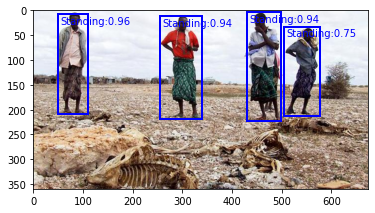

In [7]:
draw_status(image_file, status_list, confidence_threshold=0.7)